In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score

In [3]:
data = pd.read_csv('classification_data.csv')

In [4]:
for name in data.columns:
    data.rename(columns={name: name.lower()}, inplace=True)

In [5]:
for name in data.columns:
    if data[name].isnull().any():
        print(f"Missing data found in column: {name}")

In [6]:
data.columns

Index(['car_name', 'year', 'selling_price', 'present_price', 'kms_driven',
       'fuel_type', 'seller_type', 'transmission', 'owner'],
      dtype='object')

In [7]:
# data = data[data['car_name'].str.contains('Honda')]

In [8]:
data['selling_price'] = 1000 * data['selling_price']
data['present_price'] = 1000 * data['present_price']

In [9]:
X = data.drop('selling_price', axis = 1).copy()
X.dtypes

car_name          object
year               int64
present_price    float64
kms_driven         int64
fuel_type         object
seller_type       object
transmission      object
owner              int64
dtype: object

In [10]:
y = data['selling_price'].copy()

In [11]:
X_encoding = pd.get_dummies(X, columns = ['car_name', 'fuel_type', 'seller_type', 'transmission'])

for name in X_encoding.columns:
    X_encoding.rename(columns={name: name.lower()}, inplace=True)

In [12]:
X_encoding['owner'] = (X_encoding['owner'] > 0).astype(int)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_encoding, y, test_size = 0.25, random_state = 20)

clf_tree = DecisionTreeClassifier(random_state = 20, max_depth = 10)
clf_tree = clf_tree.fit(X_train, y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

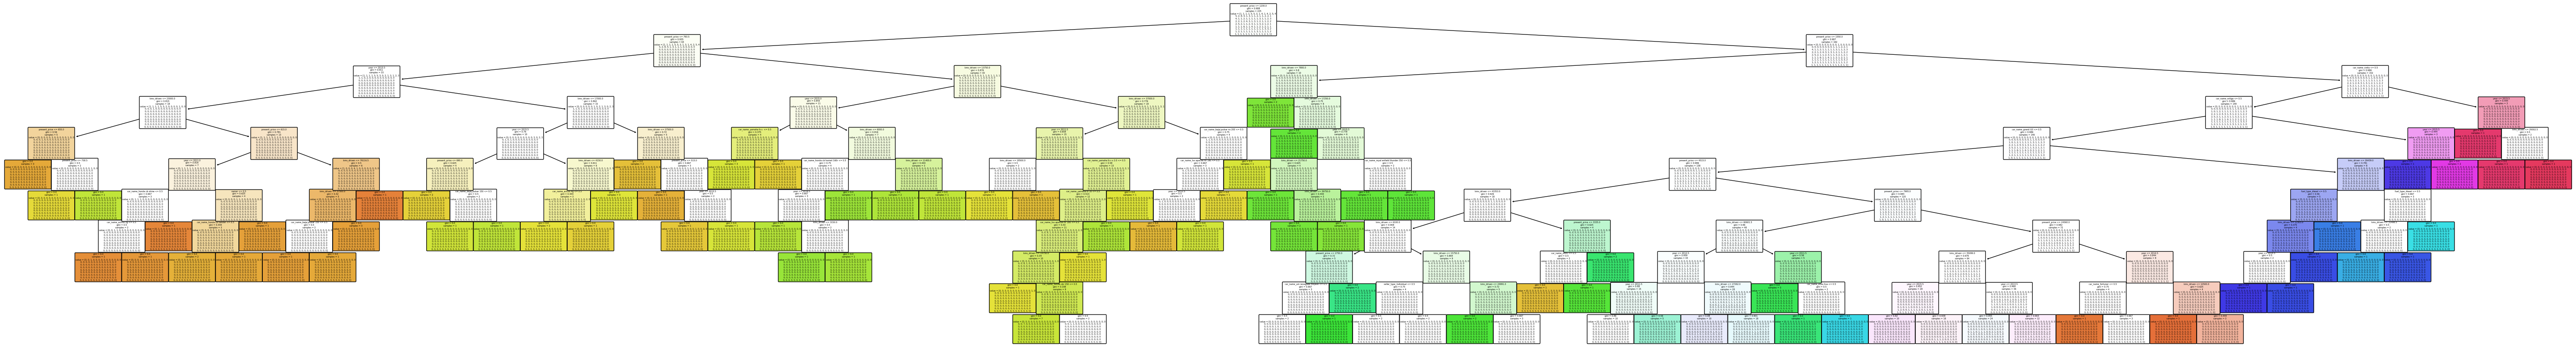

In [20]:
plt.figure(figsize = (75, 10))

plot_tree(clf_tree,
         filled = True,
         rounded = True,
         feature_names = X_encoding.columns
         )

plt.show

In [21]:
y_train_predictions = clf_tree.predict(X_train)

In [22]:
precision_score(y_train, y_train_predictions, average = 'weighted', zero_division = 0.0)

0.5272507985841319

In [23]:
recall_score(y_train, y_train_predictions, average = 'weighted', zero_division = 0.0)

0.5733333333333334

In [24]:
confusion_matrix(y_train, y_train_predictions)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])